## SVD Code 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import svd
from PIL import Image

### Parameters

In [2]:
img_name = 'sample.png' # input image name with extension
output_name = 'sample_approx' # output image name
extension = 'jpg' # output image extension
reconvert_png = True # if output image needs to be converted to png
final_extension = 'png' # final image extension
k = 200 # number of singular values to choose to get compression
quality = 30 # quality parameter of final png image. 30 is good for balance between compression and quality. Any no
             # between 0 and 85 can be chosen

In [3]:
image = Image.open(img_name)

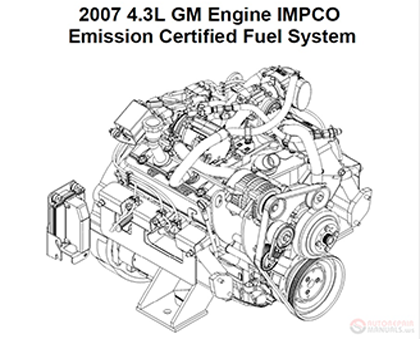

In [4]:
image

In [5]:
image.size

(420, 339)

In [6]:
img = np.asarray(image)
img.shape

(339, 420, 4)

In [7]:
# rgb channels
red = img[:,:,0] # red
green = img[:,:,1] # green
blue = img[:,:,2] # blue

In [8]:
red.shape, green.shape, blue.shape

((339, 420), (339, 420), (339, 420))

In [9]:
# calculating the svd components
ur, sr, vr = svd(red, full_matrices = False)
ug, sg, vg = svd(green, full_matrices = False)
ub, sb, vb = svd(blue, full_matrices = False)

In [10]:
ur.shape, sr.shape, vr.shape

((339, 339), (339,), (339, 420))

In [11]:
# low rank approximations
rr = np.dot(ur[:,:k], np.dot(np.diag(sr[:k]), vr[:k,:]))
rg = np.dot(ug[:,:k], np.dot(np.diag(sg[:k]), vg[:k,:]))
rb = np.dot(ub[:,:k], np.dot(np.diag(sb[:k]), vb[:k,:]))

In [12]:
ur[:,:k].shape, np.diag(sr[:k]).shape, vr[:k,:].shape

((339, 200), (200, 200), (200, 420))

In [13]:
# creating a numpy array with zeros
rimg = np.zeros((img.shape[0],img.shape[1],3))

In [14]:
# Adding matrix for R, G, B in created array
rimg[:, :, 0] = rr
rimg[:, :, 1] = rg
rimg[:, :, 2] = rb

In [15]:
# It will check if any value will be less than 0 will be converted to its absolute
# and, if any value is greater than 255 than it will be converted to 255
# because in image array of unit8 can only have value between 0 & 255
for ind1, row in enumerate(rimg):
    for ind2, col in enumerate(row):
        for ind3, value in enumerate(col):
            if value < 0:
                rimg[ind1,ind2,ind3] = abs(value)
            if value > 255:
                rimg[ind1,ind2,ind3] = 255

In [16]:
# converting the compress image array to uint8 type for further conversion into image object
compressed_image = rimg.astype(np.uint8)

In [17]:
img

array([[[255, 255, 255, 241],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [249, 249, 249, 255],
        [236, 236, 236, 241]],

       [[255, 255, 255, 253],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [249, 249, 249, 255],
        [236, 236, 236, 253]],

       [[255, 255, 255, 241],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [249, 249, 249, 255],
        [236, 236, 236, 241]],

       ...,

       [[255, 255, 255, 240],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [249, 249, 249, 255],
        [236, 236, 236, 240]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [249, 249, 249, 255],
        [236, 236, 236, 255]],

       [[255

In [18]:
compressed_image

array([[[254, 254, 255],
        [254, 254, 255],
        [254, 254, 255],
        ...,
        [254, 254, 255],
        [248, 248, 249],
        [235, 235, 236]],

       [[254, 255, 254],
        [254, 255, 254],
        [254, 255, 254],
        ...,
        [254, 255, 254],
        [248, 249, 248],
        [235, 236, 235]],

       [[254, 255, 254],
        [254, 255, 254],
        [254, 255, 254],
        ...,
        [254, 255, 254],
        [248, 249, 248],
        [235, 236, 235]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [249, 249, 249],
        [236, 236, 236]],

       [[254, 254, 255],
        [254, 254, 255],
        [254, 254, 255],
        ...,
        [254, 254, 255],
        [248, 248, 249],
        [235, 235, 236]],

       [[254, 254, 255],
        [254, 254, 255],
        [254, 254, 255],
        ...,
        [254, 254, 255],
        [248, 248, 249],
        [235, 235, 236]]

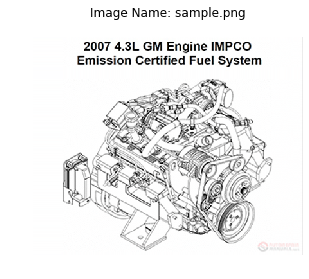

In [19]:
# Showing the compressed image in graph
plt.title("Image Name: "+img_name+"\n")
plt.imshow(compressed_image)
plt.axis('off')
plt.show()

In [20]:
compressed_image = Image.fromarray(compressed_image)

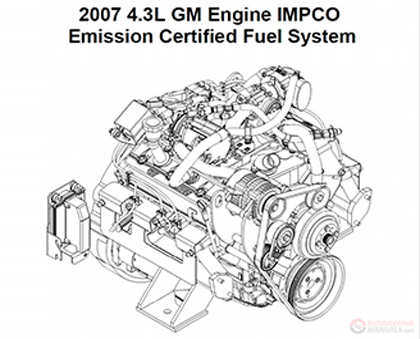

In [21]:
compressed_image

In [22]:
compressed_image.save(output_name + str(k) + '.' + extension)

In [23]:
if reconvert_png:
    final_img = Image.open(output_name + str(k) + '.' + extension)
    final_img.save(output_name + str(k) + '.' + final_extension, quality = quality)